In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
data=pd.read_csv('C:\\Chandana\\titanic.csv')

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
cols=data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [91]:
data.Age.isnull().sum()

177

In [92]:
m=data.Age.mean()
m

29.69911764705882

In [93]:
data['Age']=data['Age'].fillna(m)

In [94]:
data.Age.isnull().sum()

0

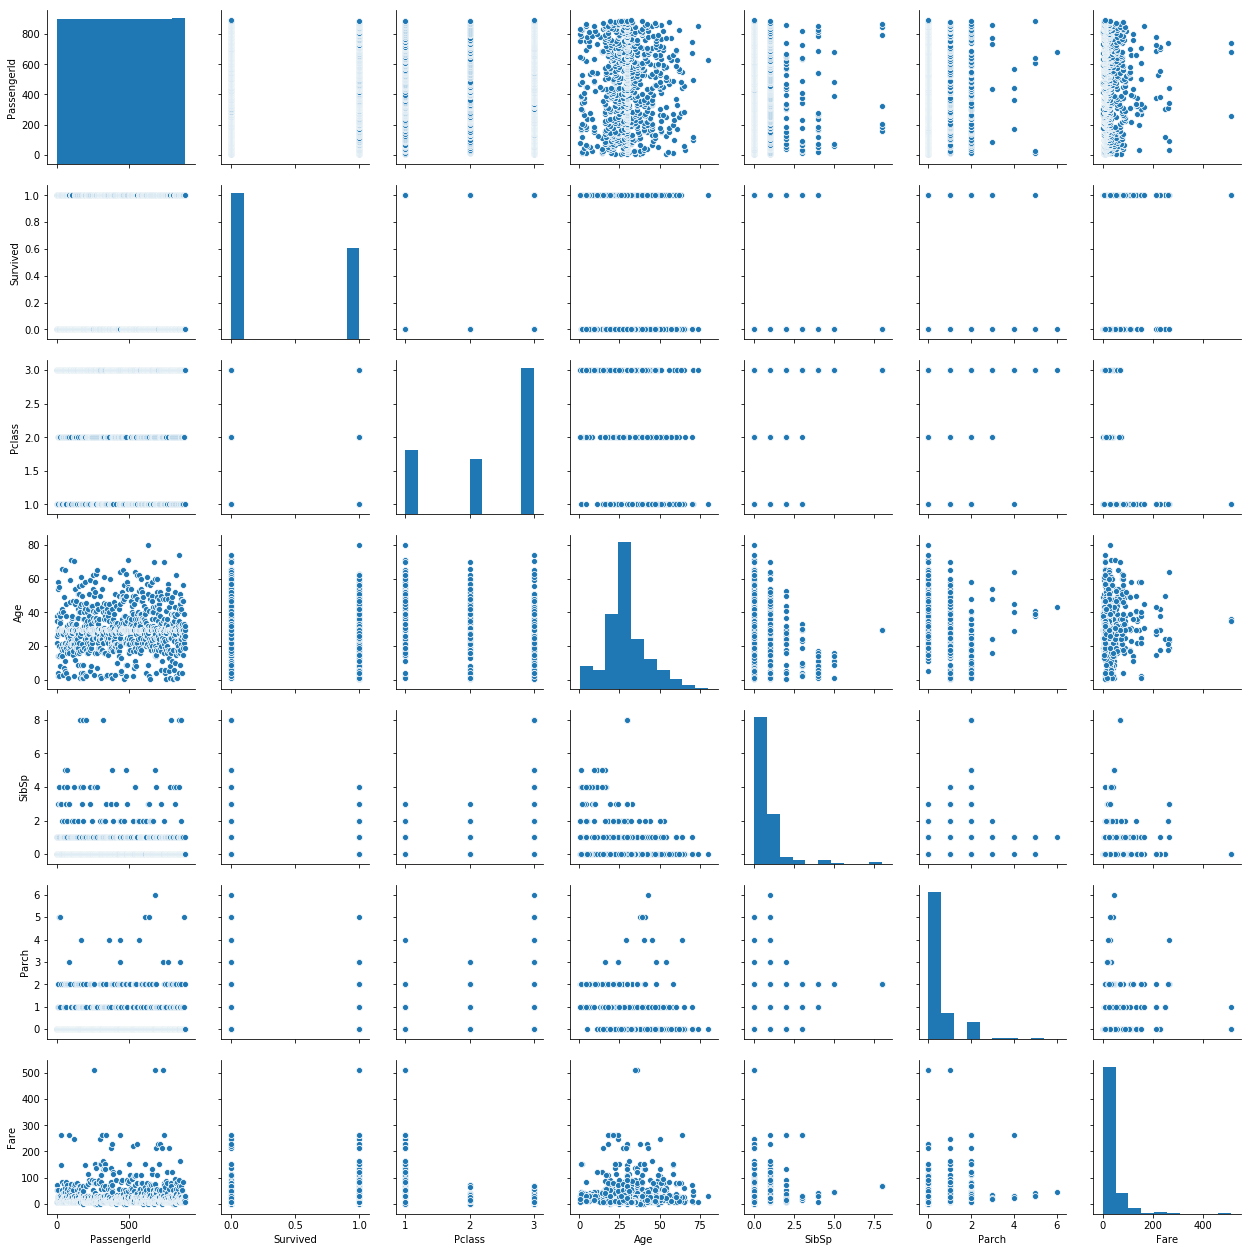

In [62]:
sns.pairplot(data)

In [14]:
corr=data.corr()

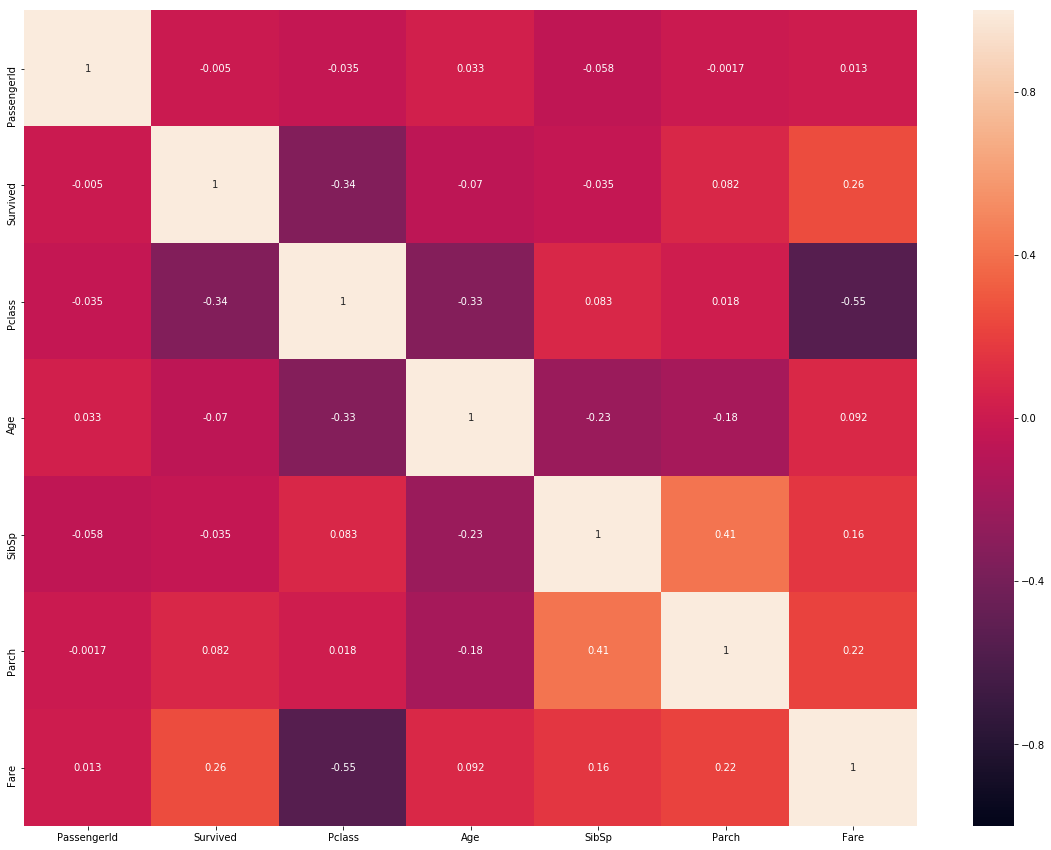

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.show() 

In [95]:
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
data=data.drop('PassengerId',axis=1)

In [97]:
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [99]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,NaN,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,NaN,S
5,0,3,male,29.699118,0,0,8.4583,NaN,Q
6,0,1,male,54.000000,0,0,51.8625,E46,S
7,0,3,male,2.000000,3,1,21.0750,NaN,S
8,1,3,female,27.000000,0,2,11.1333,NaN,S
9,1,2,female,14.000000,1,0,30.0708,NaN,C


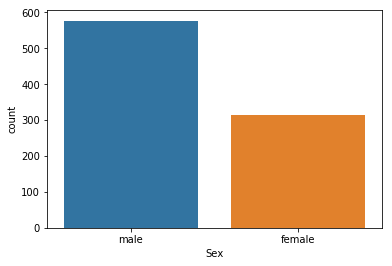

In [102]:
sns.countplot(data['Sex'])
plt.show()

In [111]:
len(data[data['Sex']=='male']) #male are 577

577

In [113]:
len(data[data['Sex']=='female']) #femmale are 314

314

Male are there in the Titanic ship compared to Women

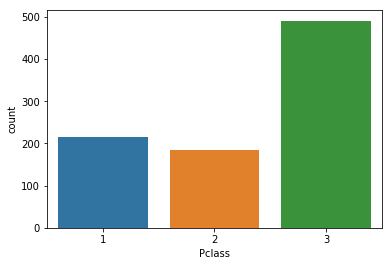

In [114]:
sns.countplot(data['Pclass'])
plt.show()

More people are there in Pclass3

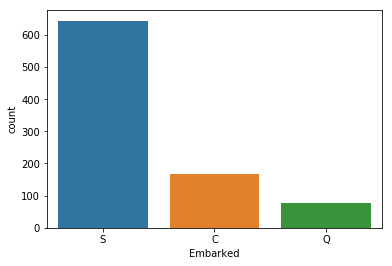

In [115]:
sns.countplot(data['Embarked'])
plt.show()

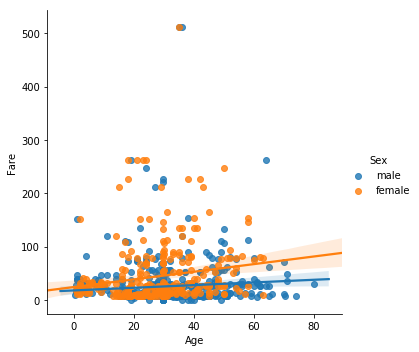

In [124]:
sns.lmplot('Age', 'Fare', hue ='Sex', data = data, fit_reg=True)

In [128]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

# Checking for null Values

In [129]:
data.Survived.isnull().sum()

0

In [130]:
data.Sex.isnull().sum()

0

In [131]:
data.SibSp.isnull().sum()

0

In [132]:
data.Parch.isnull().sum()

0

In [133]:
data.Fare.isnull().sum()

0

In [134]:
data.Cabin.isnull().sum()

687

In [135]:
data=data.drop('Cabin',axis=1)


In [136]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [137]:
y=data.Survived

In [138]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [139]:
x=data.drop('Survived',axis=1)

In [140]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S
9,2,female,14.000000,1,0,30.0708,C


In [141]:
x=x.drop('Embarked',axis=1)


In [142]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [143]:
le=LabelEncoder()
x.Sex=le.fit_transform(x.Sex)

In [144]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int32
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [145]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# LogisticRegression

In [163]:
m=LogisticRegression()
model=m.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [167]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.8212290502793296

cohen_kappa_score 0.6056725870852265

classification_report               precision    recall  f1-score   support

           0       0.89      0.84      0.86       120
           1       0.71      0.78      0.74        59

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.83      0.82      0.82       179


confusion_matrix [[101  19]
 [ 13  46]]


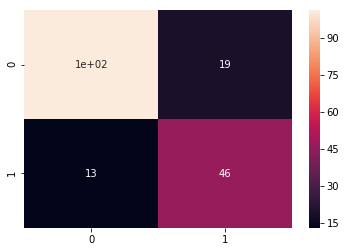

In [169]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# Knn

In [170]:
knn=KNeighborsClassifier(n_neighbors=10)
knn_fit=knn.fit(x_train,y_train)
y_knnpred = knn_fit.predict(x_test)

In [171]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.8212290502793296

cohen_kappa_score 0.6056725870852265

classification_report               precision    recall  f1-score   support

           0       0.89      0.84      0.86       120
           1       0.71      0.78      0.74        59

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.83      0.82      0.82       179


confusion_matrix [[101  19]
 [ 13  46]]


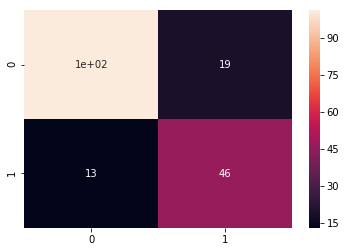

In [172]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# RandomForest

In [173]:
model=RandomForestClassifier()
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [174]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.8268156424581006

cohen_kappa_score 0.6218223948749404

classification_report               precision    recall  f1-score   support

           0       0.88      0.85      0.87       117
           1       0.74      0.77      0.76        62

   micro avg       0.83      0.83      0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179


confusion_matrix [[100  17]
 [ 14  48]]


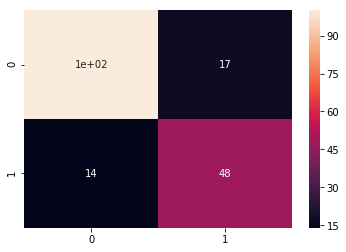

In [175]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# SVC

In [176]:
model=SVC()
model_fit=model.fit(x_train,y_train)
y_pred= model_fit.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [177]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.6871508379888268

cohen_kappa_score 0.33244539158231223

classification_report               precision    recall  f1-score   support

           0       0.74      0.76      0.75       110
           1       0.60      0.57      0.58        69

   micro avg       0.69      0.69      0.69       179
   macro avg       0.67      0.66      0.67       179
weighted avg       0.68      0.69      0.69       179


confusion_matrix [[84 26]
 [30 39]]


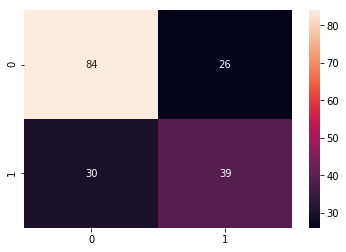

In [178]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# NaiveBias

In [179]:
model=MultinomialNB()
mn_fit=model.fit(x_train,y_train)
y_pred=mn_fit.predict(x_test)

In [180]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.7094972067039106

cohen_kappa_score 0.3592179540134931

classification_report               precision    recall  f1-score   support

           0       0.80      0.76      0.78       120
           1       0.55      0.61      0.58        59

   micro avg       0.71      0.71      0.71       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.72      0.71      0.71       179


confusion_matrix [[91 29]
 [23 36]]


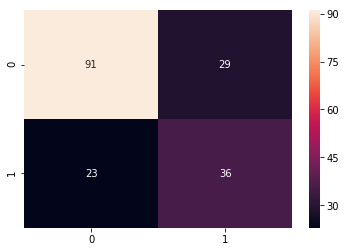

In [181]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# DecisionTree

In [182]:
model=DecisionTreeClassifier()
mn_fit=model.fit(x_train,y_train)
y_pred=mn_fit.predict(x_test)

In [183]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.7877094972067039

cohen_kappa_score 0.5557152188112344

classification_report               precision    recall  f1-score   support

           0       0.79      0.87      0.83       104
           1       0.78      0.68      0.73        75

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179


confusion_matrix [[90 14]
 [24 51]]


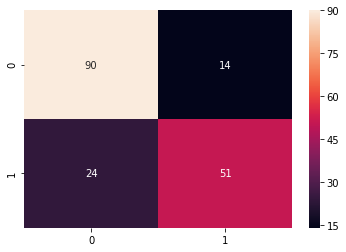

In [184]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# Adaboost

In [185]:
model=AdaBoostClassifier()
mn_fit=model.fit(x_train,y_train)
y_pred=mn_fit.predict(x_test)

In [186]:
print('accuracy_score:',accuracy_score(y_pred,y_test))
print()
print('cohen_kappa_score',cohen_kappa_score(y_pred,y_test))
print()
print('classification_report',classification_report(y_pred,y_test))
print()
print('confusion_matrix',confusion_matrix(y_pred,y_test))

accuracy_score: 0.8324022346368715

cohen_kappa_score 0.6423814597762387

classification_report               precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


confusion_matrix [[97 13]
 [17 52]]


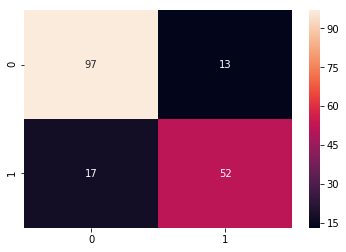

In [187]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

# Random Forest 

In [188]:
model=RandomForestClassifier()
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [189]:
model.feature_importances_

array([0.06283425, 0.28376553, 0.28307981, 0.04800604, 0.03723491,
       0.28507947])

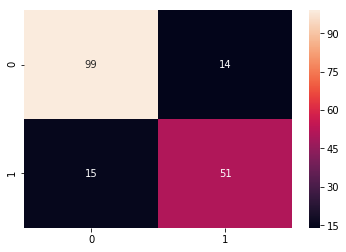

In [190]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)